In [1]:
import pandas as pd
df = pd.read_csv("../data/rides/rides2.csv")
df.columns


Index(['weekend', 'num.child', 'distance', 'rides', 'games', 'wait', 'clean',
       'overall'],
      dtype='object')

In [2]:
cols=['weekend', 'num.child', 'distance', 'rides', 'games', 'wait', 'clean']
X=df[cols]
y=df['overall']
y.value_counts()

1    255
0    245
Name: overall, dtype: int64

In [3]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['overall'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
X = df_samp[cols]
y = df_samp['overall']
y.value_counts()

0    245
1    245
Name: overall, dtype: int64

<AxesSubplot:>

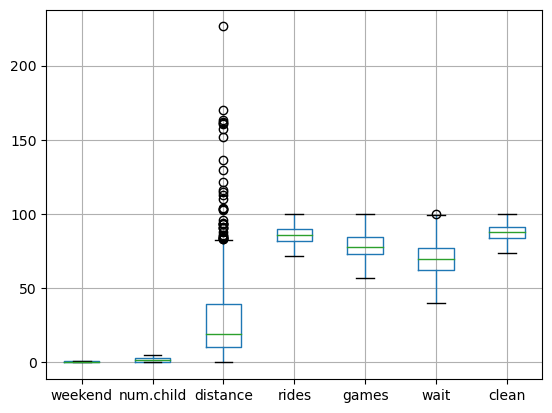

In [4]:
X.boxplot()

<AxesSubplot:>

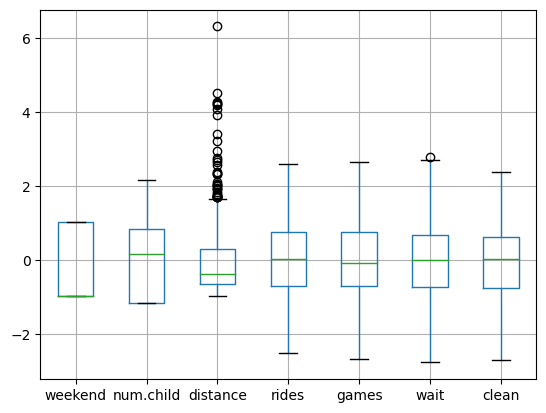

In [7]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
df_ss = pd.DataFrame(scaler.transform(X), columns=X.columns)
df_ss.boxplot()

In [8]:
X = df_ss[cols]

In [9]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
# 10의 -6승부터 3승까지 10개의 값
param_range = np.logspace(-6, 3, 10)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range, scoring="accuracy", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

In [10]:
# 최고 정확도
print(np.max(test_scores_mean))

# 최적의 감마
print(param_range[np.argmax(test_scores_mean)])

0.7938775510204081
0.1


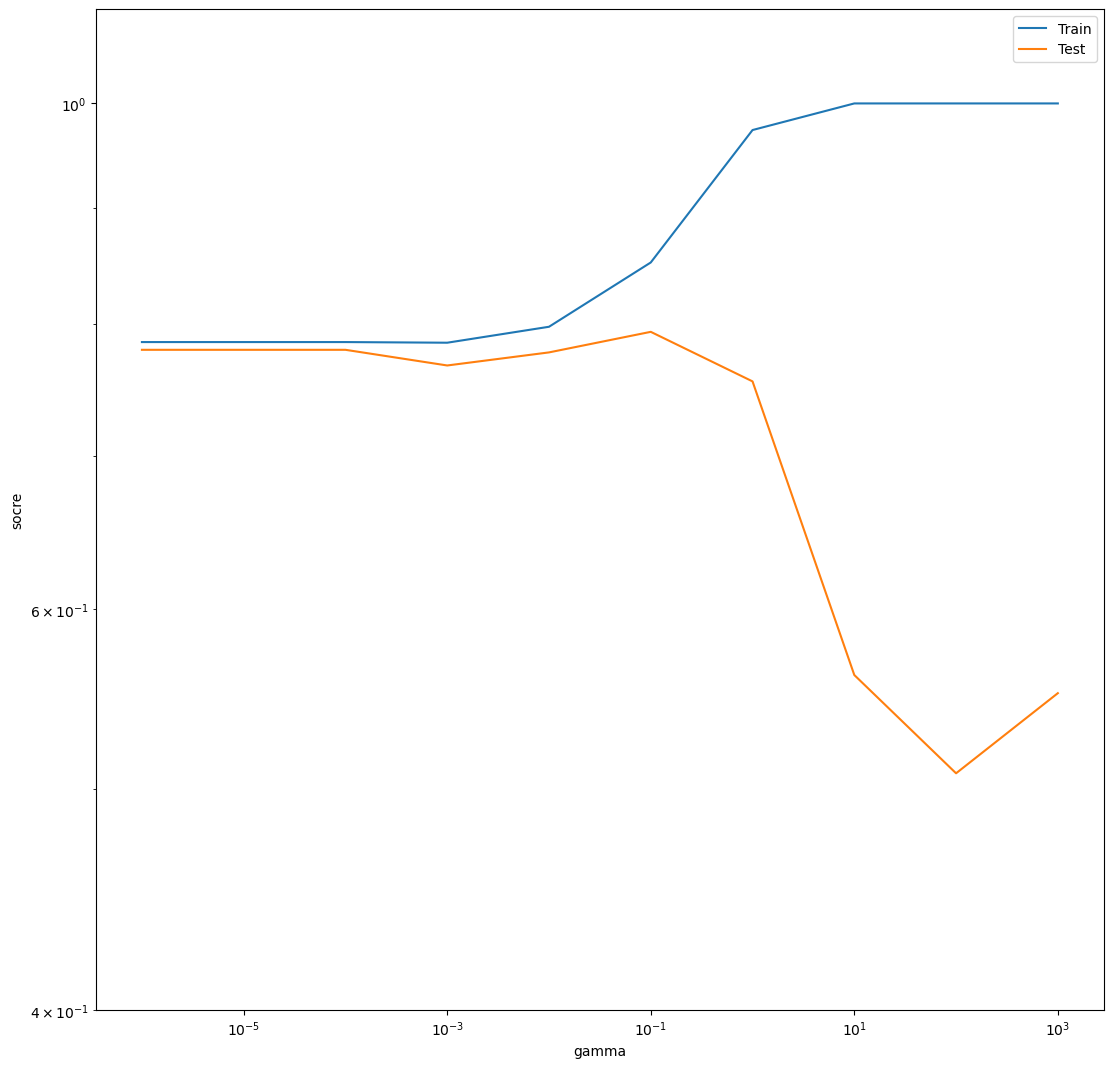

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 13))
plt.xlabel('gamma')
plt.ylabel('socre')
plt.ylim(0.4, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Train")
plt.semilogy(param_range, test_scores_mean, label="Test")
plt.legend(loc="best")
plt.show()